In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
# from tensorflow_datasets.image import dsprites

Shuffling dsprites-train.tfrecord...: 100%|█████████▉| 736822/737280 [00:46<00:00, 14453.91 examples/s]
Dataset dsprites downloaded and prepared to C:\Users\rsz6848503\tensorflow_datasets\dsprites\2.0.0. Subsequent calls will reuse this data.


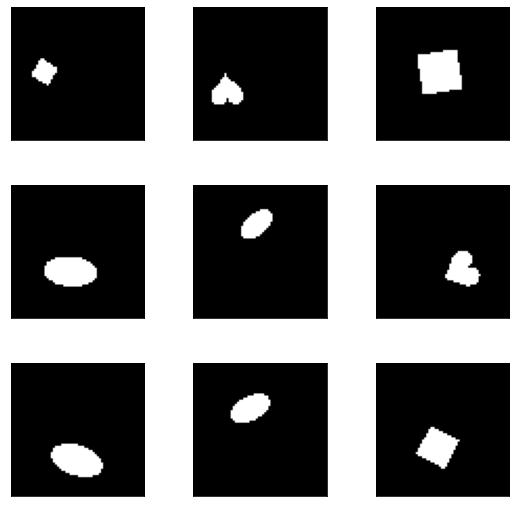

In [2]:
ds, ds_info = tfds.load('Dsprites', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)

In [3]:
print(ds)

<PrefetchDataset shapes: {image: (64, 64, 1), label_orientation: (), label_scale: (), label_shape: (), label_x_position: (), label_y_position: (), value_orientation: (), value_scale: (), value_shape: (), value_x_position: (), value_y_position: ()}, types: {image: tf.uint8, label_orientation: tf.int64, label_scale: tf.int64, label_shape: tf.int64, label_x_position: tf.int64, label_y_position: tf.int64, value_orientation: tf.float32, value_scale: tf.float32, value_shape: tf.float32, value_x_position: tf.float32, value_y_position: tf.float32}>


In [4]:
batch_size = 128
dataset = ds.shuffle(buffer_size=1024).batch(batch_size)

In [5]:
import numpy as np

for elem in dataset:
    np_image = elem['image'].numpy()
    print(np.max(np_image))
    break

1


In [6]:
print(dataset.element_spec)

{'image': TensorSpec(shape=(None, 64, 64, 1), dtype=tf.uint8, name=None), 'label_orientation': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_scale': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_shape': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_x_position': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_y_position': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'value_orientation': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_scale': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_shape': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_x_position': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_y_position': TensorSpec(shape=(None,), dtype=tf.float32, name=None)}


In [7]:
enum_data = enumerate(dataset)
for step, elem in enum_data:
    train_image_batch = elem["image"]
    print(train_image_batch.shape)

    if step > 2:
        break

(128, 64, 64, 1)
(128, 64, 64, 1)
(128, 64, 64, 1)
(128, 64, 64, 1)


In [8]:
x = (1, 3, 5)
if isinstance(x, tuple):
    x = x[0]
print(x)

1


label_y_position
[19 27 19 28 12  2  1 18 12  9  2 24 30  3 21 30  5  2 18 27 29  5 31 23
 23 15 26 11 26 27 11  3 22  1 28 11  4  9 12  0  0 20 15 18 13  0 30  1
  8 15 12 26 12 13 10  6 29 28  4 21  8 12 10 21 26 13 16  3 19 25 18 22
 29  3 27 29 21 31 27 23 11  2  9 19 11  1 19 17  7 19 13  4 20 11  6 23
 15 31 29 17  6  2 28 17 12  1  9 20 26  3  7 24 23 29 16  3  2 15 23 30
 24  3 19  0 20  2 27 23]
11
11
(2, 64, 64)


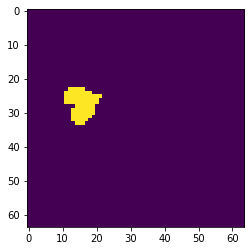

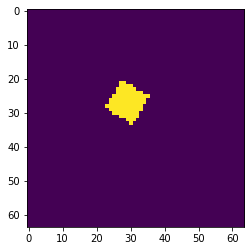

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = [
    'label_orientation',
    'label_scale',
    'label_shape',
    'label_x_position',
    'label_y_position'
]

batches = 1

# choose a generative factor
i = np.random.randint(5)
label = labels[i]
print(label)

enum_data = enumerate(dataset)
for step, batch in enum_data:
    # iterate over (batches) batch
    if step >= batches:
        break
    value_batch = batch[label].numpy()
    image_batch = batch['image'].numpy()
    print(value_batch)

    j=80
    _value_batch = np.delete(value_batch, j)
    index = np.where(_value_batch==value_batch[j])[0][0]
    if index>=j:
        index+=1
    print(value_batch[j])
    print(value_batch[index])

    img_pair = tf.reshape(tf.constant([image_batch[j], image_batch[index]]), [2, 64, 64])
    print(img_pair.shape)

    plt.imshow(img_pair.numpy()[0,:])
    plt.show()
    plt.imshow(img_pair.numpy()[1,:])
    plt.show()

In [10]:
ds_info

tfds.core.DatasetInfo(
    name='dsprites',
    full_name='dsprites/2.0.0',
    description="""
    dSprites is a dataset of 2D shapes procedurally generated from 6 ground truth
    independent latent factors. These factors are *color*, *shape*, *scale*,
    *rotation*, *x* and *y* positions of a sprite.
    
    All possible combinations of these latents are present exactly once,
    generating N = 737280 total images.
    
    ### Latent factor values
    
    *   Color: white
    *   Shape: square, ellipse, heart
    *   Scale: 6 values linearly spaced in [0.5, 1]
    *   Orientation: 40 values in [0, 2 pi]
    *   Position X: 32 values in [0, 1]
    *   Position Y: 32 values in [0, 1]
    
    We varied one latent at a time (starting from Position Y, then Position X, etc),
    and sequentially stored the images in fixed order.
    Hence the order along the first dimension is fixed and allows you to map back to
    the value of the latents corresponding to that image.
    
    We ch

In [21]:
labels = [
    'label_orientation',
    'label_scale',
    'label_shape',
    'label_x_position',
    'label_y_position'
]

latents_sizes = np.array([3,  6, 40, 32, 32])

latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:], np.array([1,])))

def latent_to_index(latents):
  return np.dot(latents, latents_bases).astype(int)

def sample_latent(size=1):
  samples = np.zeros((size, latents_sizes.size))
  for lat_i, lat_size in enumerate(latents_sizes):
    samples[:, lat_i] = np.random.randint(lat_size, size=size)

  return samples

In [22]:
sample_latent(size=1)

array([[ 0.,  0., 32., 18., 24.]])

In [39]:
# Conditional sampling of dataset
import time

# This is crazy slow. Need another way.

t0 = time.perf_counter()

l = labels.index("label_scale")

latents_sampled = sample_latent(size=10)
latents_sampled[:, l] = 0
indices_sampled = latent_to_index(latents_sampled)

samples = []
for i in indices_sampled:
    enum_data = enumerate(ds)
    for _i, elem in enum_data:
        if _i==i:
            samples.append(elem["image"])

t1 = time.perf_counter()

In [40]:
print(samples)
print(t1-t0)

[<tf.Tensor: shape=(64, 64, 1), dtype=uint8, numpy=
array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)>, <tf.Tensor: shape=(64, 64, 1), dtype=uint8, numpy=
array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
      

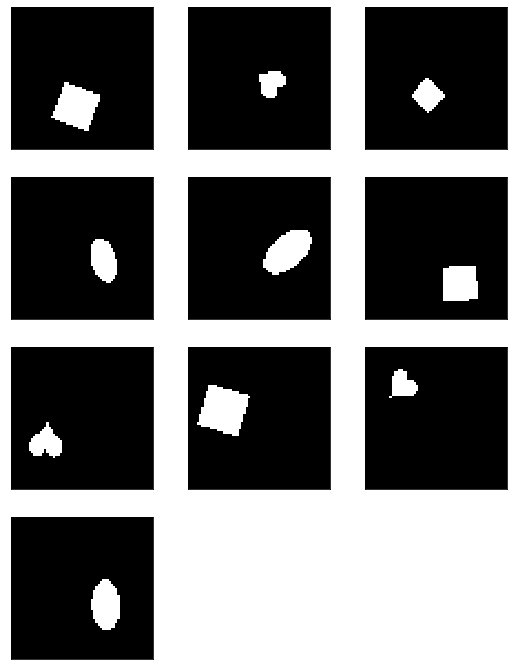

In [43]:
def show_images_grid(imgs_, num_images=10):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

show_images_grid(samples, num_images=len(samples))

In [6]:
# The better way

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})

# Load dataset
dataset_zip = np.load('dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='latin1')

print('Keys in the dataset:', dataset_zip.keys())
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
metadata = dataset_zip['metadata'][()]

print('Metadata: \n', metadata)

# Define number of values per latents and functions to convert to indices
latents_sizes = metadata['latents_sizes']
latents_names = metadata['latents_names']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))

def latent_to_index(latents):
    return np.dot(latents, latents_bases).astype(int)


def sample_latent(size=1):
    samples = np.zeros((size, latents_sizes.size))
    for lat_i, lat_size in enumerate(latents_sizes):
        samples[:, lat_i] = np.random.randint(lat_size, size=size)    
    return samples


# Helper function to show images
def show_images_grid(imgs_, num_images=25):
    ncols = int(np.ceil(num_images**0.5))
    nrows = int(np.ceil(num_images / ncols))
    _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
    axes = axes.flatten()   
    for ax_i, ax in enumerate(axes):
        if ax_i < num_images:
            ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')

def show_density(imgs):
    _, ax = plt.subplots()
    ax.imshow(imgs.mean(axis=0), interpolation='nearest', cmap='Greys_r')
    ax.grid('off')
    ax.set_xticks([])
    ax.set_yticks([])

Keys in the dataset: KeysView(<numpy.lib.npyio.NpzFile object at 0x000001ED901317C0>)
Metadata: 
 {'date': 'April 2017', 'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.', 'version': 1, 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'), 'latents_possible_values': {'orientation': array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
       2.41660973, 2.57771705, 2.73882436, 2.89993168, 3.061039  ,
       3.22214631, 3.

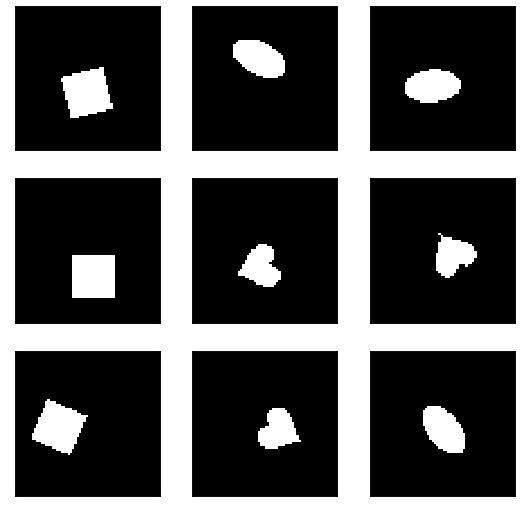

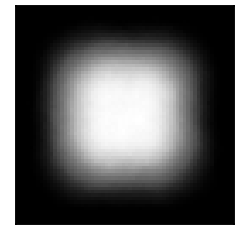

In [29]:
# Conditional sampling

latent_label_to_fix = "scale" 
latent_value_index_fixed = 5

latents_sampled = sample_latent(size=5000)
i = latents_names.index(latent_label_to_fix)
latents_sampled[:, i] = latent_value_index_fixed
indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices_sampled]

# Samples
show_images_grid(imgs_sampled, 9)

# Show the density too to check
show_density(imgs_sampled)